<p style="text-align: center; font-size: 30px" > Midterm Assignment </p>

<p style="text-align: right; font-size: 20px"> BRI519 (Fall/2025) </p>

<p style="text-align: right; font-size: 15px"> Provided on November 6 (Thursday) and due on November 17 (Monday) </p>

<br>

Your name: 오정민 (Jungmin Oh)
<br>

Your ID: 2025010643




## General Notes 

(i) Please **do not discuss** this assignment with your friends. Instead, develop your own ideas independently, using AI tools if necessary. If you use any AI tools, **explicitly state which tools were used in the corresponding notebook cell**. 

(ii) When solving each (sub-)problem, feel free to use **multiple Python and/or Markdown cells** as needed. 

(iii) Please write your responses in **English**. 

<br>

Please submit your jupyter-notebook file, **"bri519_2025fall_midterm_yourname_id.ipynb"**, to the TA (neti2207@korea.ac.kr) and instructor (jonghwan_lee@korea.ac.kr) <br>

If you have any issues, please reach out to the TA via an email.    <br>


## Question: mouseLFPAnalysis
[**Goal**] Write low-level Python code to perform analyses of LFP data (mouseLFP.mat) recorded from the mouse auditory cortex in response to tone stimuli.

<br>
Please complete the following tasks:

(a) Run the MATLAB script **mouseLFPAnalysisProgram.m**, familiarize yourself with the overall analysis steps and the dataset (**mouseLFP.mat**), and then perform the corresponding analyses.

(b) Write Python code to analyze the LFP data following the steps outlined below.


(1) **Initial Step**: Start from a blank workspace and define the necessary constant variables.


First, I have to find out some neccessary constant variables for analyses of LFP data. Therefore, i decide to carefully look inside of mouseLFP.mat by using 'loadmat' function.

In [14]:
from scipy.io import loadmat

mat = loadmat('mouseLFP.mat')
mat.keys()
DATA = mat['DATA']
fields = DATA.dtype.names
print(fields)
print(DATA[0,0])
print(DATA.shape)
print(DATA[0,0].shape)
print(DATA[0,4][:20])





None
[[ -5.29999971  -5.6781249   -5.6968751  ...  -1.87812495  -2.109375
   -1.98124993]
 [  4.9156251    4.8187499    5.0999999  ...   0.87812495   0.703125
    0.94062495]
 [ 11.43124962  10.64999962  10.51249981 ...   0.24687499   1.140625
    0.61250001]
 ...
 [  5.79999971   5.171875     4.3812499  ...   3.26874995   3.29999995
    2.60312486]
 [ -0.31874999   0.25312498  -0.484375   ...   0.28125     -0.13124999
    0.57187498]
 [-13.30937481 -13.00624943 -12.4375     ...   0.91249996   1.20937502
    0.24687499]]
(4, 7)
(200, 3000)
[[19026.294922]
 [ 9513.374023]
 [ 9513.374023]
 [ 9513.374023]
 [ 9513.374023]
 [19026.294922]
 [19026.294922]
 [ 9513.374023]
 [ 9513.374023]
 [19026.294922]
 [19026.294922]
 [ 9513.374023]
 [ 9513.374023]
 [ 9513.374023]
 [19026.294922]
 [ 9513.374023]
 [19026.294922]
 [ 9513.374023]
 [ 9513.374023]
 [ 9513.374023]]


However, there is no neccessary variables for analyses. It means that that variables must be located at 'mouseLFPAnalysisProgram.m" file as being hard coded. 

"scrSz = get(0,'ScreenSize'); %Get screensize
cutoffFrequency = 1e3; %Low pass cutoff frequency
binWidth = 5; %5 Hz bands
maxFreq = 200; %Plot signal power up to 200 Hz
numTrials = 200; %We have data from 200 trials
numSessions = 4; %We have data from this many sessions
fs = 1e4; %Sampling frequency
stimOnset = 1000; %Stimulus comes on at 100 ms.
stimOffset = 1500; %Stimulus goes off at 150 ms.
wind = hanning(256); %A 256 element hanning window will do
overl = 255; %Maximal overlap
nfft = [0:binWidth:maxFreq]; %Create the frequency bins" Like this.

The annotations below are written by Jungmin(me) not LLM AI.
But i use AI for analyze 'mouseLFPAnalysisProgram.m' file for checking constant variables and the way it analyze mouseLFP

In [18]:
import numpy as np

# ---- Filtering / spectrum-related constants ----
CUTOFF_FREQ = 1000.0   # maximum filter, cut off over the 1,000hz frequency, data collection is quite wide range
MAX_FREQ = 200.0       # analysis under 200hz frequency
BIN_WIDTH = 5.0        # divide 0 ~ 200hz frequency each 5hz
FREQ_BINS = np.arange(0, MAX_FREQ + BIN_WIDTH, BIN_WIDTH)  # 0,5,10,...,200

# ---- Data shape ----
N_TRIALS = 200  # total trials are 200
N_SESSIONS = 4  # the number of session 

# ---- Sampling ----
FS = 10000.0    # 10,000hz. 10,000 samples for 1sec

# Stimulus onset/offset in sample indices (same as MATLAB)
STIM_ONSET_SAMPLE = 1000 # as standard for sample, not time. 1000 sample means 100ms from starting of stimulus
STIM_OFFSET_SAMPLE = 1500 # means that stimulus is stop on 1500th sample

STIM_ONSET_MS = STIM_ONSET_SAMPLE / FS * 1000.0  # convert STIM_ONSET_MS by using FS and ms experession
STIM_OFFSET_MS = STIM_OFFSET_SAMPLE / FS * 1000.0

# ---- Power spectrum windowing parameters ----
WINDOW_LEN = 256 #window length
WINDOW = np.hanning(WINDOW_LEN)   # MATLAB: hanning(256)
OVERLAP = WINDOW_LEN - 1          # 255, MATLAB: overl = 255, one would be overlapped


(2) **Loader**: Load the dataset, "**mouseLFP.mat**" and assign the key data and parameters to appropriate variables


In [19]:
from scipy.io import loadmat
import numpy as np

mat = loadmat('mouseLFP.mat') # Load MATLAB file
DATA = mat['DATA']

print("DATA shape:", DATA.shape)   

# 3. Extract basic structure
N_SESSIONS = DATA.shape[0]         
N_FIELDS = DATA.shape[1]           

print("Number of sessions:", N_SESSIONS)
print("Number of fields:", N_FIELDS)


lfp_matrix = DATA[0,0] 
print("LFP matrix shape for session 1:", lfp_matrix.shape)

tone_labels = DATA[0,4]            
unique_tones = np.unique(tone_labels)

# check tones that used for mouse auditory stimulus
print("Tone label shape:", tone_labels.shape) 
print("Unique tone values:", unique_tones)

LOW_TONE = np.min(unique_tones) #find the lowest tone on data
HIGH_TONE = np.max(unique_tones) #find the highest tone on data

print("Low tone value:", LOW_TONE)
print("High tone value:", HIGH_TONE)

# count trials and sample
N_TRIALS = lfp_matrix.shape[0]     
N_SAMPLES = lfp_matrix.shape[1]

print("Trials per session:", N_TRIALS)
print("Samples per trial:", N_SAMPLES)



DATA shape: (4, 7)
Number of sessions: 4
Number of fields: 7
LFP matrix shape for session 1: (200, 3000)
Tone label shape: (200, 1)
Unique tone values: [ 9513.374023 19026.294922]
Low tone value: 9513.374023
High tone value: 19026.294922
Trials per session: 200
Samples per trial: 3000


(3) **Outlier Sample Rejection**

* The dataset was acquired from four sessions (200 trials per session), each containing either low or high auditory tone stimuli and the measured LFP signals.

* The stimulus onset and offset were 100 ms and 150 ms.

* Upon inspecting the raw data, you may notice that some trials show noisy or outlier measurements. 

* Develop a method or set of criteria to identify and exclude outlier trials from the raw data, and show the results.

* Clearly explain your reasoning for the chosen outlier detection criteria.

* Report the number of trials available before and after outlier rejection for each session.

* Report the number of trials available across all four sessions for each tone condition after outlier exclusion.

1. I checked the number of sessions and trials at Loader section which are 4 session and 200 trials for session
2. I checked onset STIM_ONSET_SAMPLE and STIM_OFFSET_SAMPLE on checking constant variables section
3. I set criteria to cut off some noisy or outlier from data. 
    A. STIM_ONSET_SAMPLE starts from 100ms of onset. So we can think that if there are some noise between 0ms to 100ms, it could be noise. But i cannot assure it is definately noise. I use root mean square method and +/- 3 standard deviation to cut off noise.
    Baseline from 0ms to 100ms is calculated by using fs and lfp_data. 
    Use numpy for mean and standard deviation.
    
    B. Second method is using peak to peak checking method. The normal frequency is belong to between max peak and min peak. Furthermore, i set median frequency so as to get median absolute deviation. and check that ptp is under the median + 5 * MAD on each trial.

    Finally i check every trials whether it can pass both method at the same time.

In [20]:
import numpy as np

def detect_outliers_session(lfp_data, fs=10000):

    baseline_end = int(0.1 * fs)  # fs is float
    baseline = lfp_data[:, :baseline_end] 

    baseline_rms = np.sqrt(np.mean(baseline**2, axis=1))
    rms_mean = np.mean(baseline_rms)
    rms_std  = np.std(baseline_rms)

    good_rms = baseline_rms < (rms_mean + 3*rms_std)
    ptp = np.ptp(lfp_data, axis=1)
    ptp_median = np.median(ptp)
    ptp_mad = np.median(np.abs(ptp - ptp_median))
    good_ptp = ptp < (ptp_median + 5 * ptp_mad)
    good_trials = good_rms & good_ptp  # it is 'and' filter for two condition
    #good_trials = good_ptp  # check whether using both filter is truly meaningful.
    #good_trials = good_rms  
    return good_trials


good_masks = []          # Save good trial mask per session
session_good_counts = [] # Save trials on session

for s in range(N_SESSIONS):
    lfp = DATA[s, 0]      
    good = detect_outliers_session(lfp)
    good_masks.append(good)
    session_good_counts.append(np.sum(good))

for i, cnt in enumerate(session_good_counts):
    print(f"Session {i+1}: {cnt} trials remain after outlier rejection")

low_counts = 0
high_counts = 0

for s in range(N_SESSIONS):
    tones = DATA[s, 4].flatten()
    good = good_masks[s]

    for i in range(N_TRIALS):
        if good[i]:  
            if tones[i] == LOW_TONE:
                low_counts += 1
            elif tones[i] == HIGH_TONE:
                high_counts += 1
            


print("\nTotal trials across all sessions (after rejection):")
print("Low tone trials:", low_counts)
print("High tone trials:", high_counts)


Session 1: 197 trials remain after outlier rejection
Session 2: 180 trials remain after outlier rejection
Session 3: 166 trials remain after outlier rejection
Session 4: 189 trials remain after outlier rejection

Total trials across all sessions (after rejection):
Low tone trials: 100
High tone trials: 361


After filtering outliers and noise, i set tone_indices list for two analyis method.
First analysis is mean waveform. Second is spectogram analysis.
So as to appling two method, i set low tone and high tone from data. 
And then, i will use both two extreme tone for analyses of LFP data.
These tone are mixed in several trials, so i select low tones and high tones from trials and save them on each list.

In [21]:
tone_indices = []

for s in range(N_SESSIONS):
    tones = DATA[s, 4].flatten()   
    good  = good_masks[s]          

    session_idx = {
        "low": [],
        "high": []
    }

    for i in range(N_TRIALS):
        if not good[i]: # pass outliers
            continue
        # low tone trial
        if tones[i] == LOW_TONE:
            session_idx["low"].append(i)

        # high tone trial
        elif tones[i] == HIGH_TONE:
            session_idx["high"].append(i)

    tone_indices.append(session_idx)

for s in range(N_SESSIONS):
    print(f"Session {s+1}: low={len(tone_indices[s]['low'])}, high={len(tone_indices[s]['high'])}")


Session 1: low=100, high=97
Session 2: low=0, high=87
Session 3: low=0, high=82
Session 4: low=0, high=95


(4) **Filtering**

* Design a 10th-order Butterworth low-pass filter with a cutoff frequency of 1000 Hz using the `scipy.signal.butter` function.

* Apply the filter to each trial in each session using the `scipy.signal.filtfilt` function.

Filtering removes unwanted frequency components from neural signals.
The butter() function designs the filter and provides the filter coefficients for low-pass, high-pass, band-pass, or band-stop filters. The filtfilt() function applies the filter forward and backward to  eliminate phase distortion and preserve the timing accuracy of LFP signals.

I used AI for analyze original matlab filtering code and learn what are exactly butterworth and filtfilt filtering.

1st, to design a 10th-order Butterworth low-pass filter. i use scipy.signal.butter function below.

In [22]:
from scipy.signal import butter

nyquist = FS / 2
normalized_cutoff = CUTOFF_FREQ / nyquist
filter_order = 10
b, a = butter(filter_order, normalized_cutoff, btype='low')

print("Filter order:", filter_order)
print("Cutoff frequency:", CUTOFF_FREQ, "Hz")


Filter order: 10
Cutoff frequency: 1000.0 Hz


Second is using scipy.signal.filtfilt on filtering method. 

In [23]:
from scipy.signal import filtfilt
import numpy as np

def apply_lowpass_filter(trial_signal, b, a):
    filtered = filtfilt(b, a, trial_signal)
    return filtered


In [24]:

filtered_data = []   # append every session

for s in range(N_SESSIONS):
    session_raw = DATA[s, 0]     
    session_filtered = []
    for t in range(N_TRIALS):
        raw_trial = session_raw[t, :]      
        filtered_trial = apply_lowpass_filter(raw_trial, b, a)
        session_filtered.append(filtered_trial)
    
    filtered_data.append(np.array(session_filtered))  # shape: (200, 3000)

print("Filtering completed for all sessions.")


Filtering completed for all sessions.


I checked the distribution of low tones and high tones from data.
It turns out that only one session has low tone and the other session do not

In [26]:
for s in range(N_SESSIONS):
    tones = DATA[s, 4].flatten()
    print(f"Session {s+1} tone counts:")
    print(" Low :", np.sum(tones == LOW_TONE))
    print(" High:", np.sum(tones == HIGH_TONE))
    print()


Session 1 tone counts:
 Low : 101
 High: 99

Session 2 tone counts:
 Low : 0
 High: 99

Session 3 tone counts:
 Low : 0
 High: 99

Session 4 tone counts:
 Low : 0
 High: 99



(5) **Main Analysis**

(i) Propose two different ideas or methods to analyze the LFP signals in response to low and high tone stimuli, and describe each approach below.

(ii) Apply both methods to the LFP data for each session, present the results in both the time and frequency domains, and discuss your findings.

(Idea/Method 1)

Method 1: Time-domain LFP Analysis, Mean Waveform
This method is inspired by original matlab file. I guess this file applies mean waveform analysis.
This method averages LFP signals across trials to reveal stimulus-locked responses.
It emphasizes changes in amplitude and timing after stimulus onset, enabling comparison of low tone vs high tone responses in the time domain. 

Across the four sessions, only Session 1 contained both low-tone and high-tone trials (101 vs 99).
Sessions 2–4 contained only high-tone trials (0 low, 99 high), suggesting that the experiment used a mixed-tone block followed by high-tone-only blocks.
Therefore, time-domain and frequency-domain comparisons between low and high tones were performed only for Session 1, while Sessions 2–4 were analyzed using high-tone responses only.

Code implementation below with results and discussion

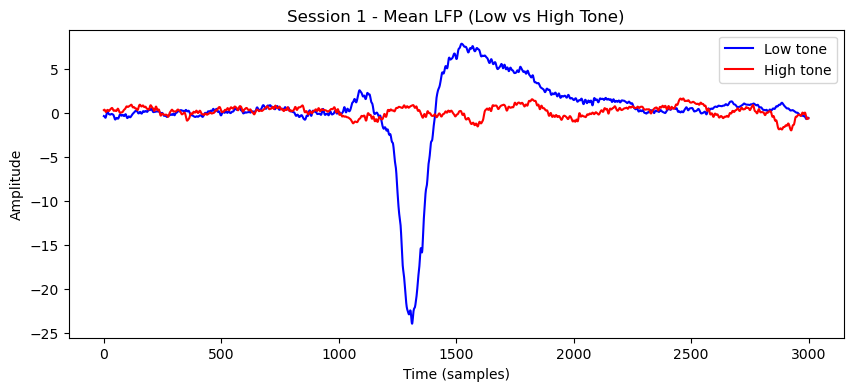

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


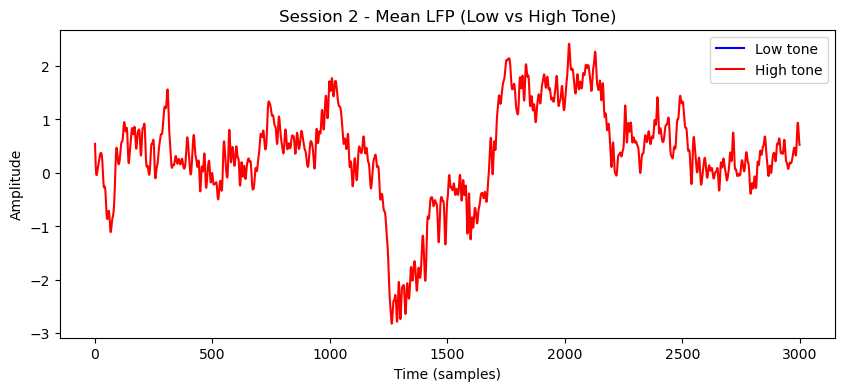

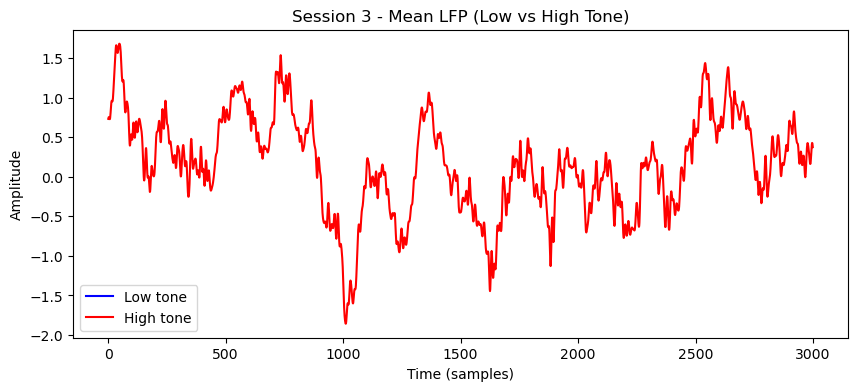

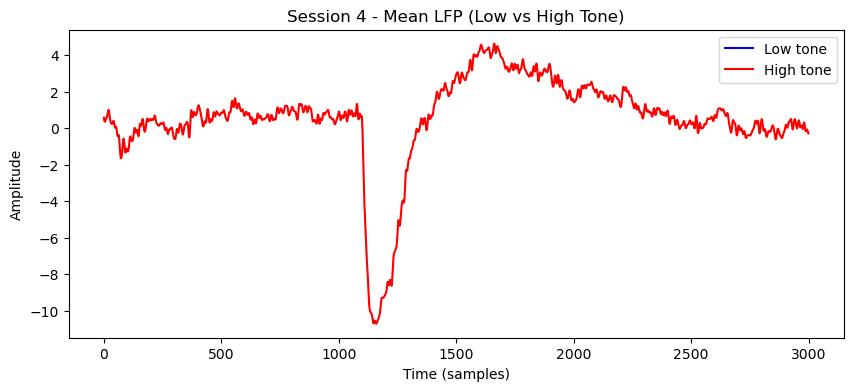

In [25]:
import numpy as np
import matplotlib.pyplot as plt

for s in range(N_SESSIONS):
    low_trials  = filtered_data[s][tone_indices[s]['low']]
    high_trials = filtered_data[s][tone_indices[s]['high']]

    mean_low  = np.mean(low_trials, axis=0)
    mean_high = np.mean(high_trials, axis=0)

    plt.figure(figsize=(10,4))
    plt.title(f"Session {s+1} - Mean LFP (Low vs High Tone)")
    plt.plot(mean_low, label='Low tone', color='blue')
    plt.plot(mean_high, label='High tone', color='red')
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


Time-domain analysis of the LFP revealed strong stimulus-locked negative deflections around 100–140 ms in Sessions 1 and 4, indicating robust auditory evoked potentials. 
- Session 1 showed selective responses to low tones, with high tones eliciting only minimal fluctuations. Conversely, Session 4 displayed strong responses for high tones. 
- Sessions 2 and 3 showed little or no evoked components, suggesting lower signal quality or higher trial-to-trial variability.

(Idea/Method 2)

AI is used to implement of spectogram.

LFP (Local Field Potential) signals change not only in their amplitude over time, but also in their frequency content. When a tone stimulus is presented (around 100–150 ms), certain frequency bands can become stronger or weaker. A simple time-domain waveform (mean LFP) cannot fully show these changes. Therefore, the spectogram can be one of supplmental analysis method.

A spectrogram uses the Short-Time Fourier Transform (STFT) to display how power changes across both time and frequency. This makes it possible to see whether the stimulus increases power in specific frequency ranges. Therefore, the spectrogram is an essential method for analyzing how neural oscillations change in response to the stimulus. It reveals frequency-based neural patterns that cannot be seen from the waveform alone.


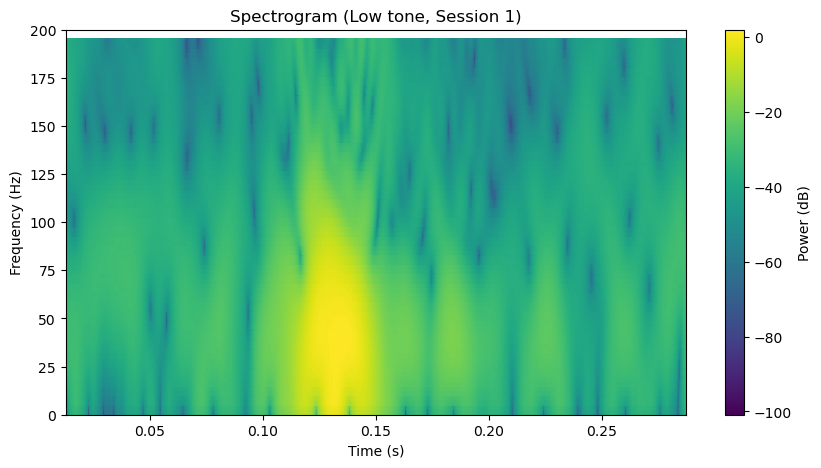

In [ ]:
from scipy.signal import spectrogram
import numpy as np
import matplotlib.pyplot as plt

f, t, Sxx = spectrogram(mean_low, fs=FS,
                        window='hann',
                        nperseg=256,
                        noverlap=255,
                        nfft=2048,    
                        scaling='density')

mask = f <= 200 # fs is under 200 , over 0
f2 = f[mask]
S2 = Sxx[mask, :]

plt.figure(figsize=(10,5))
plt.pcolormesh(t, f2, 10*np.log10(S2 + 1e-12), shading='gouraud')
plt.ylim([0, 200])
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (Low tone, Session 1)")
plt.colorbar(label="Power (dB)")
plt.show()


The spectrogram of the low-tone response in Session 1 shows a clear increase in power shortly after stimulus onset, especially between 0.10–0.15 seconds. This increase appears mainly in the low-to-mid frequency range (roughly 10–60 Hz), suggesting that the low tone induces stronger oscillatory activity in these bands. In contrast, higher frequencies (above 100 Hz) remain relatively weak. Overall, the spectrogram reveals a time-locked burst of frequency-specific activity that cannot be observed from the waveform alone.

Code implementation below with results and discussion

(iii) Apply both methods to the **LFP data combined across the four sessions**, present the results in **both the time and frequency domains**, and discuss your findings, including a **comparison with the results obtained from analyzing each session separately**.


Discuss the findings 

(6) **Save the Results**

* Store your outputs, including the **raw data**, **low-pass filtered data**, and **main analysis results**.

End of assignment